In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_da_us = df_da_us.dropna(subset='salary_year_avg')

In [20]:
df_da_us = df_da_us.explode('job_skills')
df_da_us[['salary_year_avg','job_skills']]

df_da_us_grp = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_da_top_pay = df_da_us_grp.sort_values(by='median',ascending=False).head(10)
df_da_skills = df_da_us_grp.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

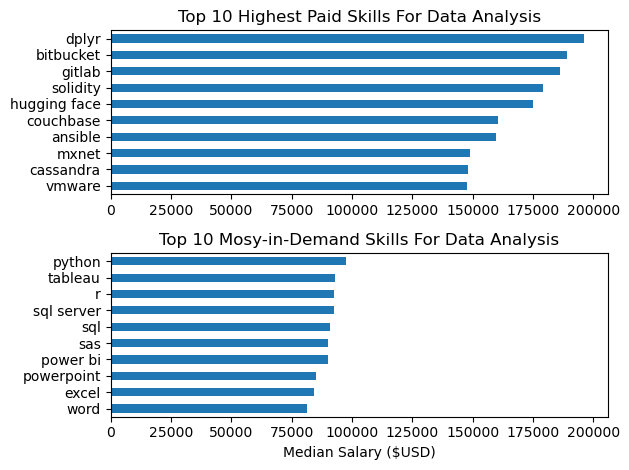

In [41]:
fig, ax = plt.subplots(2,1)

df_da_top_pay[::-1].plot(kind = 'barh',y = 'median',ax = ax[0], legend = False)
ax[0].set_title('Top 10 Highest Paid Skills For Data Analysis')
ax[0].set_ylabel('')
df_da_skills[::-1].plot(kind = 'barh',y = 'median',ax = ax[1],legend=False)
ax[1].set_title('Top 10 Mosy-in-Demand Skills For Data Analysis')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')

fig.tight_layout()
